# Tablas de contingentia

+ Un investigador desea estudiar si existe una relación significativa entre el sexo de las personas y su preferencia por dos deportes populares: fútbol y baloncesto. Para ello, selecciona una muestra de 100 personas, donde se registra el sexo (masculino o femenino) y la preferencia deportiva de cada individuo (fútbol o baloncesto).

+ Los datos recogidos se organizan en una tabla de contingencia, y el investigador realiza una prueba de independencia Chi-cuadrado para evaluar si la preferencia deportiva depende del sexo o si ambas variables son independientes.

+ Con base en los resultados de la prueba Chi-cuadrado, el investigador debe concluir si existe una asociación significativa entre el sexo y la preferencia por fútbol o baloncesto en la muestra analizada.

+ Pregunta principal: ¿Existe una relación significativa entre el sexo y la preferencia por un deporte en esta población?

In [4]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [5]:
# Crear los datos de ejemplo (sexo y preferencia deportiva)
data = {
    'Sexo': ['Masculino'] * 30 + ['Masculino'] * 10 + ['Femenino'] * 20 + ['Femenino'] * 40,
    'Deporte': ['Fútbol'] * 30 + ['Baloncesto'] * 10 + ['Fútbol'] * 20 + ['Baloncesto'] * 40
}

# Crear un DataFrame con los datos
df = pd.DataFrame(data)
df

,Sexo,Deporte
0,Masculino,Fútbol
1,Masculino,Fútbol
2,Masculino,Fútbol
3,Masculino,Fútbol
4,Masculino,Fútbol
...,...,...
95,Femenino,Baloncesto
96,Femenino,Baloncesto
97,Femenino,Baloncesto
98,Femenino,Baloncesto


In [6]:

# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(df['Sexo'], df['Deporte'])
tabla_contingencia

Deporte,Baloncesto,Fútbol
Sexo,,
Femenino,40,20
Masculino,10,30



Resultados de la prueba Chi-cuadrado:
Chi-cuadrado: 15.041666666666668
P-valor: 0.00010516355403363114
Grados de libertad: 1
Frecuencias esperadas:
 [[30. 30.]
 [20. 20.]]


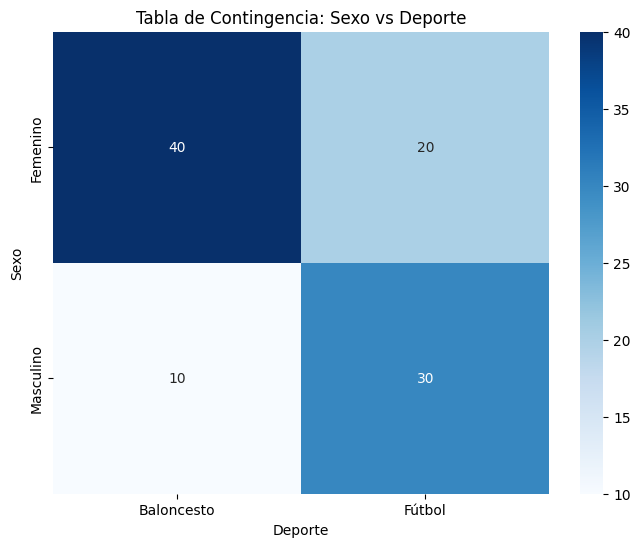

In [7]:
# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Mostrar los resultados de la prueba Chi-cuadrado
print("\nResultados de la prueba Chi-cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas:\n {expected}")

# Crear un gráfico de mapa de calor para visualizar la tabla de contingencia
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, cmap="Blues", fmt="d")
plt.title("Tabla de Contingencia: Sexo vs Deporte")
plt.ylabel("Sexo")
plt.xlabel("Deporte")
plt.show()

**Interpretación**
1. Tabla de contingencia:
+ La tabla de contingencia refleja la distribución de la muestra de 100 personas con respecto a las dos variables categóricas:
    +  **sexo** y **preferencia deportiva** (fútbol o baloncesto).
+ Los datos observados muestran que:
    + **30 hombres** prefieren fútbol y **10 hombres** prefieren baloncesto.
    + **20 mujeres** prefieren fútbol y **40 mujeres** prefieren baloncesto.
+ Esto sugiere inicialmente que más hombres prefieren fútbol y más mujeres prefieren baloncesto, pero necesitamos una prueba estadística para evaluar si esta diferencia es significativa.

2. Prueba Chi-cuadrado:
+ El **valor de Chi-cuadrado** calculado es **15.04**, lo que indica la magnitud de la desviación entre las frecuencias observadas y las esperadas bajo la hipótesis nula de independencia.
    + El **p-valor** resultante es **0.0001**, mucho menor que el umbral común de significancia de 0.05. 
        + Esto nos permite **rechazar la hipótesis nula**, que establece que no existe relación entre el sexo y la preferencia deportiva.
        + Los **grados de libertad** son 1, ya que cada variable tiene 2 niveles. 
    + Las **frecuencias esperadas** asumen que no hay relación entre las variables:
    + Para las mujeres, se esperarían 30 personas en cada categoría (fútbol y baloncesto).
    + Para los hombres, se esperarían también 20 personas en cada categoría. 
+   Sin embargo, las frecuencias observadas difieren notablemente de las esperadas, lo que sugiere una **asociación significativa** entre el sexo y la preferencia deportiva.

3. Mapa de calor:
+ El gráfico muestra de manera visual las frecuencias observadas para cada combinación de sexo y preferencia deportiva.
+ Los valores en cada celda corresponden a las frecuencias absolutas: el número de personas en cada categoría.
+ El color azul más oscuro indica frecuencias más altas. 
    + En este caso, las **mujeres que prefieren baloncesto** (40) es el grupo más numeroso, seguido de los **hombres que prefieren fútbol** (30).
+ La diferencia visual es evidente: hay una clara tendencia de **los hombres hacia el fútbol** y **las mujeres hacia el baloncesto**, 
    + lo que refuerza la interpretación de los resultados de la prueba estadística.

**Resumen:**
+ La prueba Chi-cuadrado y el mapa de calor nos permiten concluir que **existe una relación significativa entre el sexo y la preferencia por deportes** en esta muestra. 
+ En términos más simples, las preferencias deportivas no son independientes del sexo: 
    + los hombres tienden a preferir el fútbol, mientras que las mujeres muestran una mayor preferencia por el baloncesto.

__________________________________________________________________________________________________________________________________________